y = f(x)

y = Dependent variable , target , label 
x = independent variable , Feature , attribute 


In [ ]:
import sklearn
features = [[140,"smooth"],[130,"smooth"],[150,"bumpy"],[170,"bumpy"]]
labels = ["apples", "apples", "orange", "orange"]

In [21]:
from sklearn import tree 
features = [[140 , 1],[130 , 1] , [150,0] ,[170,0]]
labels = [0,0,1,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features , labels) 
print(clf.predict([[150,0]]))

[1]


In [31]:
import pandas as pd
df = pd.read_csv("FuelConsumption.csv")
print(df.info())
print("\n") 
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB
None


         Year  ENGINE SIZE   CYLINDERS  FUEL CONSUMPTION  COEMISSIONS 
count   639.0   639.000000  639.000000        639.000000    639.000000
mean   2000.0     3.265728    5.805947         14.713615    296.809077
std       0.0     1.231012    1.625588          

In [35]:
df.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [37]:
cdf = df[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS ']]
cdf.head()
          

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230


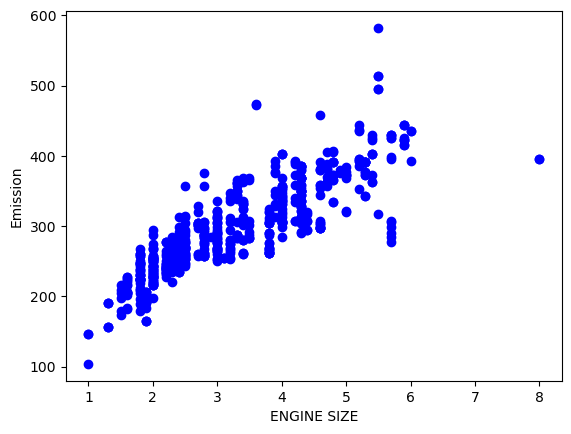

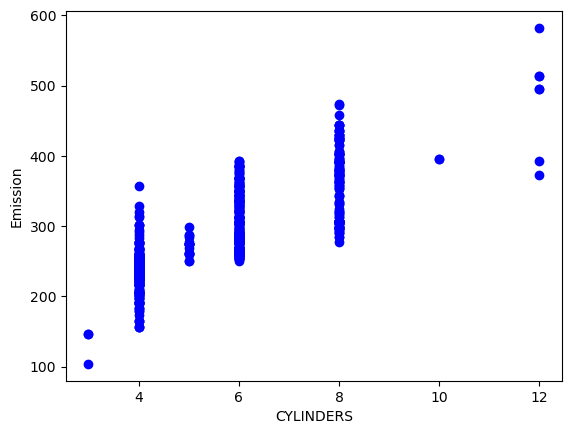

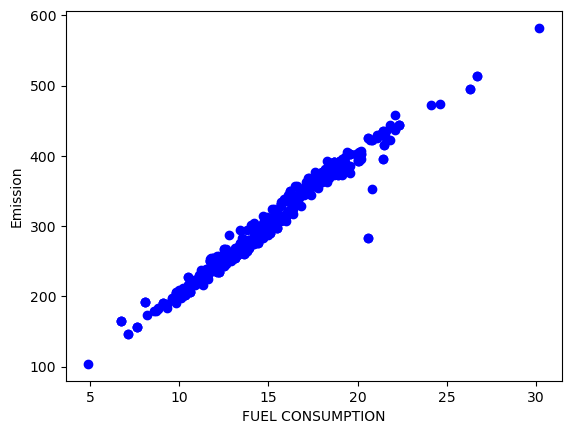

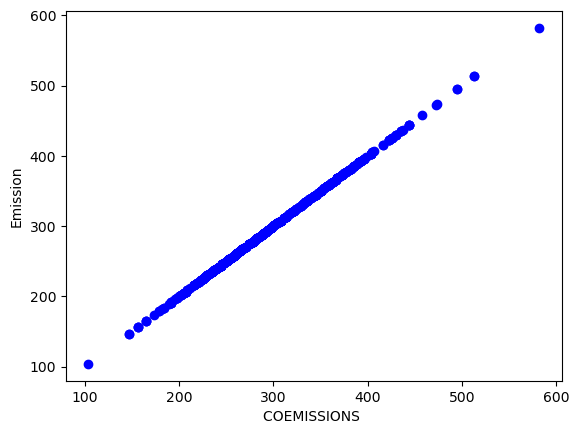

In [39]:
from matplotlib import pyplot as plt
for i in cdf[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS ']]:
    plt.scatter(cdf[i],cdf['COEMISSIONS '] , color='blue') 
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()

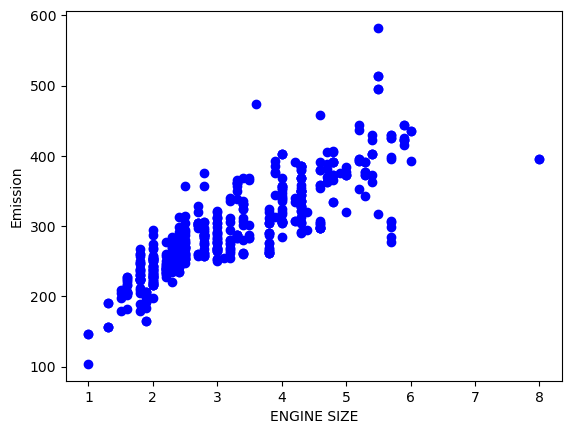

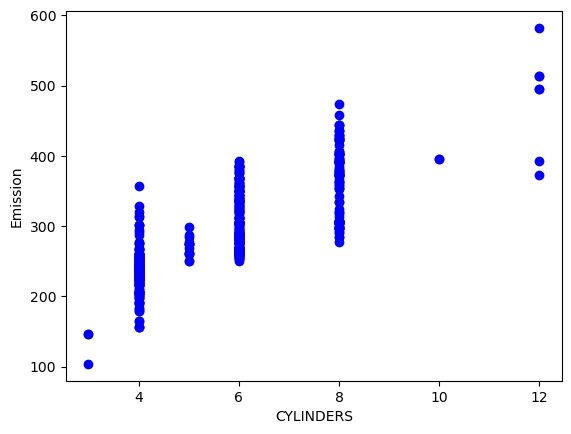

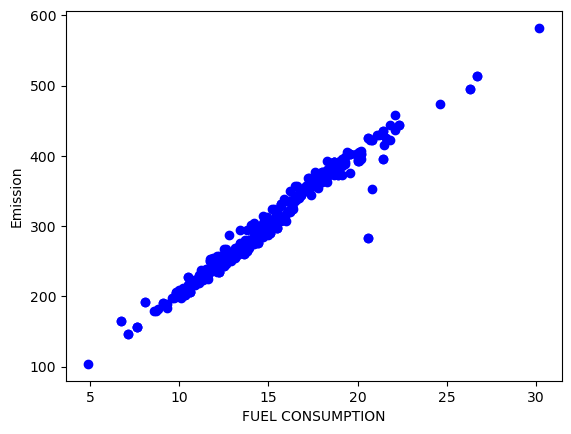

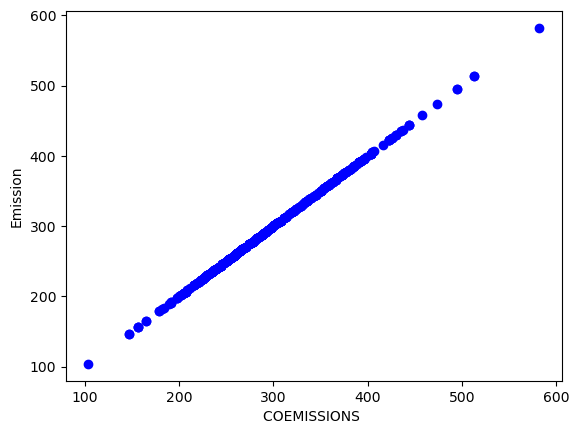

In [45]:
import numpy as np 
mask = np.random.rand(len(df)) < 0.80
train = cdf[mask]  #80%
test = cdf[~mask] #20% 
for i in train[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS ']]:
    plt.scatter(train[i],train['COEMISSIONS '] , color='blue') 
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()

In [49]:
from sklearn import linear_model 
coefficient = [] 
intercept = [] 
regress_model = {}
for i in train[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS ']]:
    regr = linear_model.LinearRegression()
    train_x = np.asanyarray(train[[i]])
    train_y = np.asanyarray(train[['COEMISSIONS ']])
    regr.fit(train_x , train_y)
    regress_model[i] = regr 
    print("Relation between {} & {}".format(i, "'COEMISSIONS '"))
    print('Coefficients: ' , regr.coef_)
    print('Intercept : ' , regr.intercept_)
    coefficient.append(regr.coef_)
    intercept.append(regr.intercept_)
    print("\n")
    
    

Relation between ENGINE SIZE & 'COEMISSIONS '
Coefficients:  [[45.4839468]]
Intercept :  [147.96519519]


Relation between CYLINDERS & 'COEMISSIONS '
Coefficients:  [[32.1785699]]
Intercept :  [109.51641621]


Relation between FUEL CONSUMPTION & 'COEMISSIONS '
Coefficients:  [[19.38408072]]
Intercept :  [11.30056246]


Relation between COEMISSIONS  & 'COEMISSIONS '
Coefficients:  [[1.]]
Intercept :  [7.95807864e-13]




(505,)
(505,)


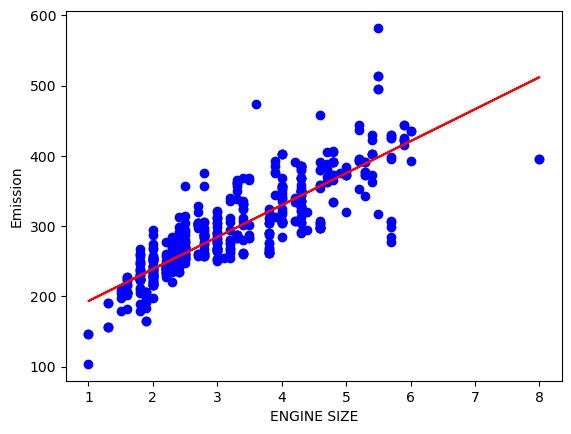

(505,)
(505,)


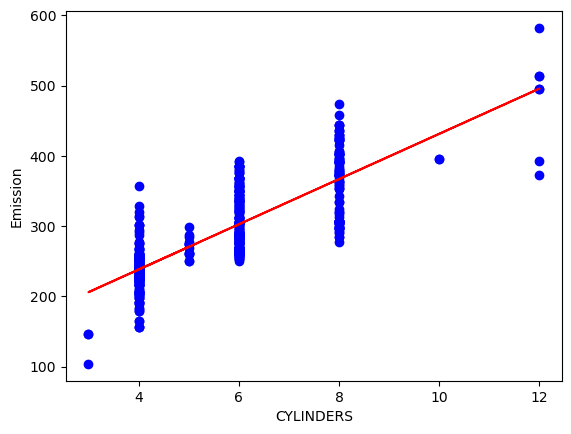

(505,)
(505,)


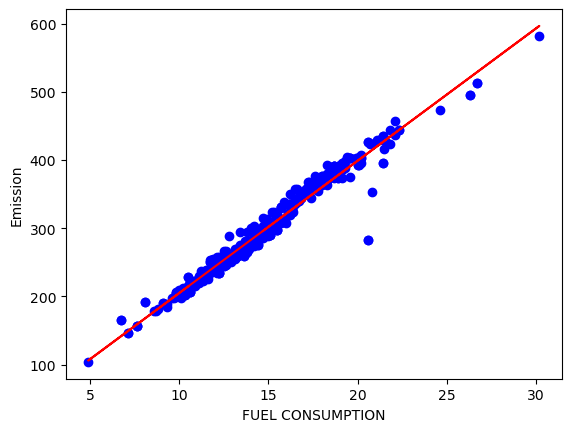

(505,)
(505,)


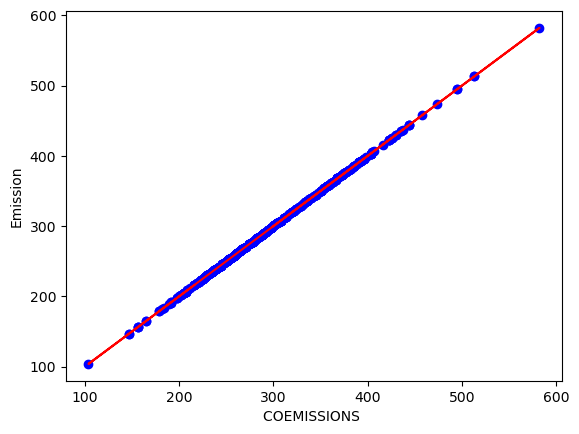

In [51]:
j = 0 
for i in train[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS ']]:
    plt.scatter(train[i] , train['COEMISSIONS '] , color = 'blue')
    x = train[i].values
    print(x.shape)
    y = coefficient[j][0]*x + intercept[j]
    print(y.shape)
    l = len(y)
    y = np.reshape(y,(l,))
    plt.plot(x,y,'-r')
    plt.xlabel(i)
    plt.ylabel("Emission") 
    plt.show()
    j = j+1 

In [57]:
from sklearn.metrics import r2_score 
for i in train[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS ']]:
    test_x = np.asanyarray(train[[i]])
    test_y = np.asanyarray(train[['COEMISSIONS ']])
    test_y_ = regress_model[i].predict(test_x)
    print("Fitting Error between {} & {}".format(i,"'CO2EMISSIONS'"))
    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Residual Sum of squares (MSE) : %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score : %.2f"  % r2_score(test_y_ , test_y) ) 
    print("\n") 
    


Fitting Error between ENGINE SIZE & 'CO2EMISSIONS'
Mean absolute error: 25.16
Residual Sum of squares (MSE) : 1226.50
R2-score : 0.62


Fitting Error between CYLINDERS & 'CO2EMISSIONS'
Mean absolute error: 31.48
Residual Sum of squares (MSE) : 1580.21
R2-score : 0.45


Fitting Error between FUEL CONSUMPTION & 'CO2EMISSIONS'
Mean absolute error: 8.06
Residual Sum of squares (MSE) : 159.97
R2-score : 0.96


Fitting Error between COEMISSIONS  & 'CO2EMISSIONS'
Mean absolute error: 0.00
Residual Sum of squares (MSE) : 0.00
R2-score : 1.00




Lab 2   


In [59]:
import warnings
warnings.filterwarnings("Ignore") 
warnings.simplefilter(action='Ignore' , category=FutureWarning)

AssertionError: invalid action: 'Ignore'

In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler , MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFE  
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [72]:
data = pd.read_csv("train.csv") 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
data.describe(include = "all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [76]:
data.shape

(1460, 81)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [82]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [84]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [86]:
data.PoolQC.value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [88]:
data.Alley.value_counts()


Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [90]:
data.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [92]:
data.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

3rd October 

In [9]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame , Series 
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet , SGDRegressor
# from sklearn.datasets import load_boston 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [15]:
def pretty_print_linear(coefs , names=None , sort= False ):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs , names)
    if sort :
        lst = sorted(lst,key=lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s " % (round(coef,3) , name) for coef , name in lst)
    

In [19]:
boston = pd.read_csv("Boston.csv")
boston 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [21]:
def load_data():
    boston = load_boston()
    print(boston.DESCR)
    x = boston["data"]
    y = boston["target"]
    names = boston["feature_names"]
    return x,y,names 

In [23]:
def scale_data(x):
    scaler = StandardScaler()
    x = scaler.fit_tansform(x)
    return x 

In [ ]:
def split_data(x,y):
    x_train , x_test ,  y_train , y_test = train_test_split(x , y , test_size=0.33 , random_state = 42)
    return x_train , x_test ,  y_train , y_test 

In [ ]:
def root_mean_square_error(y_pred , y_test) : 
    rmse_train = np.sqrt(np.dot(abs(y_pred-y_test) , abs(y_pred-y_test))/len(y_test))
    return rmse_train

In [ ]:
def plot_real_vs_predicted(y_pred, y_test):
    plt. plot(y_pred, y_test, 'ro') 
    plt. plot([0, 50], [0, 50], 'g-')
    plt. xlabel('predicted')
    plt. ylabel('real')
    plt. show()
    return plt

In [27]:
def generate_regression_values(model, X, y):
    params = np.append(model.intercept_, model.coef_)
    predictions = model.predict(X)
    newx = pd.DataFrame({"Constant": np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((y - predictions) ** 2)) / (len(newx) - len(newx.columns))
    # Note if you don't want to use a DataFrame replace the two lines above with
    # newx = np.append(np.ones((len(X), 1)), X, axis=1)
    # MSE = (sum((y - predictions) ** 2)) / (len(newx) - len(newx[0]))
    var_b = MSE * (np.linalg.inv(np.dot(newx.T, newx)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b
    P_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(newx) - 1))) for i in ts_b]
    return params, predictions, MSE, var_b, sd_b, ts_b, P_values